## Tutorial 3: Guide to Gates

### Introduction

The first part of this tutorial discusses some general features of gates, including the circuit notataion, symbols, controlled gates, parameterized gates and the creation of custom gates.

The second part is an alphabetical list of gates of the supported gates with detailed descriptions.

### Imports and Definitions

The following imports and definition are used for the examples in this tutorial:

In [1]:
import cmath
from math import pi

import numpy as np

from tinyqsim import gates
from tinyqsim.qcircuit import QCircuit

PI = '\u03C0'  # Unicode PI
PHI = '\u03d5'  # Unicode PHI

### Symbols and Notation

A quantum circuit is created using the QCircuit constructor and can be drawn with the 'draw' method:

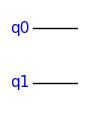

In [2]:
qc = QCircuit(2)  # 2 qubits
qc.draw()

The horizontal lines represent the qubits of the quantum circuit. So far, this is just an empty circuit with two qubits, q0 and q1. TinyQsim uses the Big-Endian qubit convention, so q0 is the most-significant qubit.

An instance of a quantum gate (e.g. the CX gate) can be added to the circuit by calling the corresponding method, with the the arguments specifying the qubits to which the gate is applied. CX is a controlled-NOT gate with 2 qubits. The first qubit in the parameter list is the control and the second qubit is the target. A control is indicated by a dar

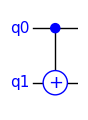

In [3]:
qc.cx(0, 1)
qc.draw()

Gate names are upper case (e.g. 'CX') whereas the corresponding QCircuit method names are lower case (e.g. 'cx') to comply with Python naming conventions.

See the QCircuit class in the API documentation for details of the API of the gates.

```
cx(c: int, t: int)
   c : the control qubit
   t : the target qubit
```

The call `qc.cx(0,1)` creates an instance of the gate with the control connected to qubit q0 and the target connected to q1.

If the arguments had been in the reverse order, q1 would have been the control and q0 the target, as shown here:

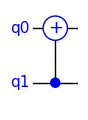

In [4]:
qc = QCircuit(2)
qc.cx(1, 0)
qc.draw()

In a quantum circuit the gates are often applied to non-consective qubits, such as q0 and q2. For example:

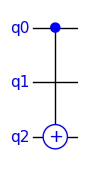

In [5]:
qc = QCircuit(3)
qc.cx(0, 2)
qc.draw()

The vertical line passes over q1 without a dot, as q1 plays no role. If there were a dot on q1, it would indicate a gate with two controls, which would make it a CCX (controlled-controlled-NOT) gate. For example:

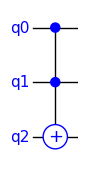

In [6]:
qc = QCircuit(3)
qc.ccx(0, 1, 2)  # CCX with 3 arguments
qc.draw()

Since swapping the two controls of a CCX gates makes no difference, the symbol does not distinguish between them.

TinyQsim supports creation of custom gates, which may have both parameters and controls. In order to allow automatic generation of symbols for custom gates, a generic rectangle is used for the gate body.

The following example illustrates a custom gate with two control qubits and two target qubits:

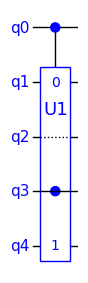

In [7]:
mygate = np.eye(4)  # Dummy custom gate

qc = QCircuit(5)
qc.ccu(mygate, 'U1', 0, 3, 1, 4)
qc.draw()

The following points should be noted about this example:

- The dotted line on qubit q2 indicates that it just passes through without playing a role.

- The first two arguments (0, 3) of the call are the control qubits, which are indicated by a dot. The control qubits may be inside or outside the box as shown here.

- The numbers (0, 1) in the symbol indicate that these are arguments 0 and 1 for the unitary U (excluding controls). In the example, these are connected to qubits q1 and q4.

### Controlled Gates

Gates can have a *controlled* variant. The control enables the operation of the gate. It is drawn as a dark dot in the gate symbol.

The controlled version CU of a gate U applies the gate if the control is $\ket{1}$. For example, for a one-qubit gate defined by the unitary matrix $U$:

$$
CU = \ket{0}\bra{0} \otimes I + \ket{1}\bra{1} \otimes U
$$

Since the input may be in a superposition of $\ket{0}$ and $\ket{1}$, the result is the superposition of the results for the gate applied to the two cases.

TinyQsim provides controlled versions of many of the common gates. For example, CX is a controlled version of the X gate. Controls are denoted by a solid dot in the symbol, as shown in the earlier examples of the CX gate. It is possible for a gate to have multiple controls, such as the CCX gate.

A generic U gate is provided that allows a unitary matrix $U$ to be applied as a gate. This has CU and CCU variants. See the sections on the U, CU and CCU gates below for details.

### Anti-Controlled Gates

Anti-controlled gates are ones where the control is inverted, so that it disables the operation instead of enabling it. These are sometimes drawn like a controlled gate but with a hollow (white) control dot instead of a solid (dark) one.

TinyQsim does not have specific support for them, but the same effect can be created by sandwiching a control between two X gates, as shown here:

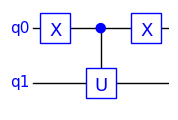

In [8]:
u = np.eye(2)  # Dummy gate

qc = QCircuit(2)
qc.x(0)
qc.cu(u, 'U', 0, 1)
qc.x(0)
qc.draw()

### Angle Parameters

One-qubit gates implement rotations of the state vector on the Bloch sphere. Some of these are fixed-angle rotations, such as X, Y, Z, S, T, etc. Others allow a user-specified rotation angle.

The P, CP, RX and RY gates have two parameters for the angle. The first is the angle in radians and the second is a label for the circuit symbol that shows the angle in a convenient form, such as a multiple of $\pi$.

The following examples show how to specify the label using a simple ASCII 'pi' or a Unicode $\pi$.

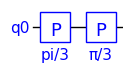

In [9]:
PI = '\u03C0'  # PI unicode character

qc = QCircuit(1)
qc.p(pi / 3, 'pi/3', 0)  # ASCII 'pi/3'
qc.p(pi / 3, f'{PI}/3', 0)  # Unicode PI/3
qc.draw()

### Custom Gates

Custom gates are possible using the U gate that takes a unitary matrix as an argument. For example:

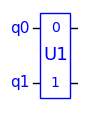

In [10]:
u1 = np.array([[1, 0, 0, 0],  # Define a unitary matrix
               [0, 0, 1, 0],
               [0, 1, 0, 0],
               [0, 0, 0, 1]])

qc = QCircuit(2)
qc.u(u1, 'U1', 0, 1)  # Apply the matrix as a gate
qc.draw()

This automatically generates a symbol which is labelled with the string given as the second argument.

There are also CU and CCU variants for controlled-U and controlled-controlled-U gates. For example:

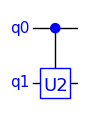

In [11]:
u2 = np.array([[0, 1],  # Define a unitary matrix
               [1, 0]])

qc = QCircuit(2)
qc.cu(u2, 'U2', 0, 1)  # Apply the matrix as a gate
qc.draw()

The matrix in this case only defines the operation that is to be controlled but not the control itself. It could have been defined as a 'U' gate with a 4x4 matrix that included the control action. However, this would have been more complicated and the circuit symbol would not have shown which qubit was the control.

For further details see the 'U', 'CU' and 'CCU' gates later in this guide.

### Parameterized Custom Gates

A parameterized gate can be defined as a function that returns a unitary matrix.

For example, suppose that we wish to create the following custom parameterized phase gate.

$$
\text{RK}(k) =\begin{bmatrix}1 & 0 \\ 0 & e^{\large\frac{2\pi i}{2^k}}\end{bmatrix}
$$

One way to define it is:

In [12]:
def rk(k: int):
    return np.array([[1, 0], [0, cmath.exp(1j * 2 * pi / 2 ** k)]])

Alternatively, we could define it in terms of the existing P (phase) gate, as follows:

In [13]:
def rk(k: int):
    return gates.P(2 * pi / 2 ** k)

If we call this function with the argument 3 it returns a unitary matrix:

In [14]:
rk(3)

array([[1.        +0.j        , 0.        +0.j        ],
       [0.        +0.j        , 0.70710678+0.70710678j]])

In either case, the gate can be added to the circuit like this:

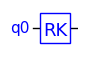

In [15]:
qc = QCircuit(1)
qc.u(rk(3), 'RK', 0)  # Add rk(3) to qubit 0
qc.draw()

Note that the unitary matrix definitions of the gates are defined in the tinyqsim 'gates' package. For example, the matrix of the CX gates is:

In [16]:
gates.CX

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0]])

### Global Phase

Some gates may appear to be equivalent, but actually differ in a subtle way.

For example, the RX(theta) gate performs a rotation by 'theta' radians about the X axis, whilst the X gate performs a rotation by $\pi$ about the X axis. So it might seem that $RX(\pi) = X$.

However, because of the way they are defined:

$$
RX(\pi) = \begin{bmatrix}
0 & -i \\ -i  & 0
\end{bmatrix}\quad\textrm{and}\quad
X = \begin{bmatrix}
0 & 1 \\ 1  & 0
\end{bmatrix}
$$

Hence $X=i\,RX(\pi)$.

A global phase term has no effect on any experiment we can perform. Consider a quantum state with a global phase term $e^{i\phi}$:

$$\ket{\psi} = e^{i\phi}(\alpha_0 \ket{0} + \alpha_1 \ket{1})$$

Then the probability of the measurement outcome $\ket{0}$, for example, is:

$$
\begin{align*}
p(\ket{0}) &= (e^{i\phi}\alpha_0)^*\, (e^{i\phi}\alpha_0)\\
&=\alpha_0^*\,\alpha_0\\
&=|\alpha_0|^2
\end{align*}
$$

where $^*$ denotes complex conjugation.

Consequently, the global phase term has no effect on the measurement outcome.

This extends to a multi-qubit system since:

$$(e^{i\phi} \ket{\psi}) \otimes \ket{\chi} = e^{i\phi}(\ket{\psi} \otimes \ket{\chi})$$

---
## Summary of Gates

| API                               | Description                              | 
|:----------------------------------|:-----------------------------------------|
| qc.ccu(matrix, label, c1, c2, *t) | Controlled-controlled-U gate             |
| qc.ccx(c1, c2, t)                 | Controlled-controlled-X (aka Toffoli)    |
| qc.ch(c, t)                       | Controlled-H                             |
| qc.cp(phi, label, c, t)           | Controlled-P                             |
| qc.cs(c, t)                       | Controlled-S                             |
| qc.cswap(c, t1, t2)               | Controlled SWAP (aka Fredkin)            |
| qc.ct(c, t)                       | Controlled-T                             |
| qc.cu(matrix, label, c, *t)       | Controlled-U gate                        |
| qc.cx(c, t)                       | Controlled-X (aka CNOT)                  |
| qc.cy(c, t)                       | Controlled-Y                             |
| qc.cz(c, t)                       | Controlled-Z                             |
| qc.h(t)                           | Hadamard                                 |
| qc.i(t)                           | Identity (aka ID)                        |
| qc.p(phi, label, t)               | Phase: 'phi' radians about Z axis        |
| qc.rx(theta, label, t)            | Rotation by 'theta' radians about X axis |
| qc.ry(theta, label, t)            | Rotation by 'theta' radians about Y axis |
| qc.s(t)                           | pi/2 phase (S = sqrt(Z))                 |
| qc.sdg(t)                         | -pi/2 phase (S-dagger)                   |
| qc.swap(t1, t2)                   | Swap 2 qubits                            |
| qc.sx(t)                          | Sqrt(X) (aka V, SQRTX)                   |
| qc.t(t)                           | pi/4 phase (T = sqrt(S))                 |
| qc.tdg(t)                         | -pi/4 phase (T dagger)                   |
| qc.u(matrix, label, *t)           | Use unitary matrix as a gate             |
| qc.x(t)                           | Pauli X (aka NOT)                        |
| qc.y(t)                           | Pauli Y                                  |
| qc.z(t)                           | Pauli Z                                  |

The argument names are abbreviations for:

```
  c      Control qubit
  t      Target qubit
  *t     One or more target qubits
  label  Text label
  phi    Angle in radians
  theta  Angle in radians
```

The following are additional circuit elements that are strictly not gates because they are not reversible unitary operations.

| API                               | Description                              | 
|:----------------------------------|:-----------------------------------------|
| qc.barrier()                      | Insert barrier in circuit (not a gate)   |
| qc.measure(*t)                    | Measurement operation (not a gate)       |
| qc.reset(t)                       | Reset qubit to |0>                       |

---
## Alphabetical List of Gates

### CCU

The CCU gate is a controlled-controlled custom unitary gate. See the U gate for further details.

It applies unitary matrix U to the target qubit if both the controls are $\ket{1}$.

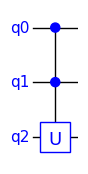

In [17]:
u = np.eye(2)  # Dummy gate

qc = QCircuit(3)
qc.ccu(u, 'U', 0, 1, 2)
qc.draw()

``` 
API:
   ccu(u: ndarray, name: str, c1: int, c2: int, *t: int)
      u    : unitary numpy matrix
      name : Name of gate   
      c1   : the first control qubit
      c2   : the second control qubit
      *t   : the target qubits
```

The unitary matrix is of size $2^k \times 2^k$ for $k$ target qubits.

### CCX (aka Toffoli) Gate

The CCX gate is a controlled-controlled-X gate. See the X gate for further details.

It applies an X (NOT) operation to the target qubit if both the controls are $\ket{1}$.

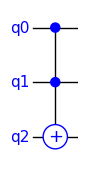

In [18]:
qc = QCircuit(3)
qc.ccx(0, 1, 2)
qc.draw()

```
API:
   ccx(c1: int, c2: int, t: int)
      c1 : the first control qubit
      c2 : the second control qubit
      t  : the target qubit
```

### CH Gate

The CH gate is a controlled version of the Hadamard (H) gate. See the H gate for further details.

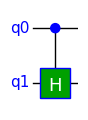

In [19]:
qc = QCircuit(2)
qc.ch(0, 1)
qc.draw()

```
API:
   ch(c: int, t: int)
      c : the control qubit
      t : the target qubit
```

### CP Gate

The CP gate is a controlled version of the P gate. See the P gate for further details.

The first argument is the phase angle in radians. The second argument is the phase angle as a string that is used to label the circuit symbol. The phase angles are typically multiples of 'pi', so it is convenient to use the unicode 'pi' in the text string. See the P gate for further details.

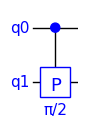

In [20]:
qc = QCircuit(2)
qc.cp(pi / 2, f'{PI}/2', 0, 1)
qc.draw()

```API:
   cp(phi: float, phi_text: str, c: int, t: int)
      phi      : the phase angle in radians
      phi_text : Text annotation for the angle
      c        : the control qubit
      t        : the target qubit
```

### CS Gate

The CS gate is a controlled version of the S gate. See the S gate for further details.

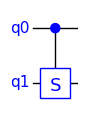

In [21]:
qc = QCircuit(2)
qc.cs(0, 1)
qc.draw()

```
API:
   cs(c: int, t: int)
      c : the control qubits
      t : the target qubit
```

### CSWAP (aka Fredkin) Gate

The CSWAP gate is a controlled version of the SWAP gate. See the SWAP gate for further details.

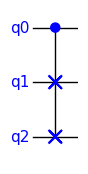

In [22]:
qc = QCircuit(3)
qc.cswap(0, 1, 2)
qc.draw()

```
API:
   cswap(c: int, t1: int, t2: int)
      c  : the control qubits
      t1 : the first target qubit
      t2 : the second target qubit
```

### CT Gate

The CT gate is a controlled version of the T gate. See the T gate for further details.

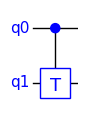

In [23]:
qc = QCircuit(2)
qc.ct(0, 1)
qc.draw()

```
API:
   ct(c: int, t: int)
      c : the control qubit
      t : the target qubit
```

### CU

The CU gate is a controlled custom unitary gate. See the U gate for further details.

It applies unitary matrix U to the target qubit if the control is $\ket{1}$.

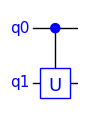

In [24]:
u = np.eye(2)  # Dummy gate

qc = QCircuit(2)
qc.cu(u, 'U', 0, 1)
qc.draw()

```
API:
   cu(u: ndarray, name: str, c: int, *t: int)
      u    : unitary numpy matrix
      name : Name of gate   
      c    : the control qubit
      *t    : the target qubits
```

The unitary matrix is of size $2^k \times 2^k$ for $k$ target qubits.

### CX (aka CNOT) Gate

The CX gate is a controlled version of the X gate. It is also known as the CNOT gate. It plays an important role in quantum algorithms.

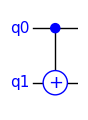

In [25]:
qc = QCircuit(2)
qc.cx(0, 1)
qc.draw()

```
API:
   cx(c: int, t: int)
      c : the control qubit
      t : the target qubit
```

### CY Gate

The CY gate is a controlled version of the Y gate. See the Y gate for further details.

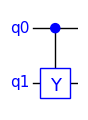

In [26]:
qc = QCircuit(2)
qc.cy(0, 1)
qc.draw()

```
API:
   cy(c: int, t: int)
      c : the control qubit
      t : the target qubit
```

### CZ Gate

The CZ gate is a controlled version of the Z gate. See the Z gate for further details.

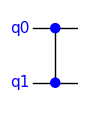

In [27]:
qc = QCircuit(2)
qc.cz(0, 1)
qc.draw()

```
API:
   cz(c: int, t: int)
      c : the control qubit
      t : the target qubit
```

### H Gate

The Hadamard (H) gate is an important gate in quantum computing because it can create a superposition from a basis state. It can also be used to switch between the Z basis and the X basis.

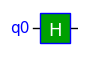

In [28]:
qc = QCircuit(1)
qc.h(0)
qc.draw()

```
API:
   h(t: int)
      t : the target qubit
```

The H gate is described by the following matrix:

$$
H = \frac{1}{\sqrt{2}}\begin{bmatrix}1 & 1 \\ 1 & -1 \end{bmatrix}
$$

### I (aka ID) Gate

The I gate is the identity gate. The physical implementation in a quantum computer is simply 'do nothing'. Although it has no effect, it can be useful when analysing circuits. It is usually just drawn as a line, but may occasionally be made explicit as follows:

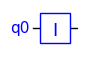

In [29]:
qc = QCircuit(1)
qc.i(0)
qc.draw()

```
API:
   i(t: int)
      t : the target qubit
```

The I gate is described by the identity matrix:

$$
I = \begin{bmatrix}1 & 0 \\ 0 & 1 \end{bmatrix}
$$

### P Gate

The phase gate P rotates the phase of a qubit around the Z axis in the Bloch sphere.

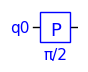

In [30]:
qc = QCircuit(1)
qc.p(pi / 2, f'{PI}/2', 0)  # For phi = pi/2
qc.draw()

The P gate is described by the following matrix:

$$
P(\phi) =\begin{bmatrix}1 & 0 \\ 0 & e^{i\phi} \end{bmatrix}
$$

```
API:
   p(phi: float, label: str, t: int)
      phi   : the phase angle in radians
      label : text label for the angle
      t     : the target qubit
```

The first argument is the phase angle in radians. The second argument is the phase angle as a string. The phase angles are typically multiples of $\pi$, so it is convenient to use unicode $\pi$ in the text string.

When the phase gate is applied to a qubit $\alpha_0\ket{0} + \alpha_1\ket{1}$, the result is:

$$
\begin{bmatrix}1 & 0 \\ 0 & e^{i\phi} \end{bmatrix}\begin{bmatrix}\alpha_0 \\ \alpha_1 \end{bmatrix}=\begin{bmatrix}\alpha_0 \\ \alpha_1 e^{i\phi}\end{bmatrix}
$$

Note that all the phase is applied to the $\ket{1}$ state. It is not necessary to apply separate phases to the two basis states as only the relative phase matters. The global phase does not affect the measurement outcome.

The following are special cases of the phase gate that have their own names as they are frequently used:

$$
\begin{align*}
Z &= P(\pi)\\[0.3em]
S &= P(\frac{\pi}{2})= \sqrt{Z}\\[0.3em]
T &= P(\frac{\pi}{4})= \sqrt{S}
\end{align*}
$$

### RX Gate

The RX gate performs a rotation by 'theta' radians about the X axis of the Bloch Sphere.

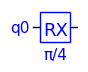

In [31]:
qc = QCircuit(1)
qc.rx(pi / 4, f'{PI}/4', 0)
qc.draw()

```
API:
   rx(theta: float, t: int)
      theta : the angle in radians
      label : text label for the angle
      t     : the target qubit
```

The RX gate is described by the following matrix:

$$
RX(\theta) = \begin{bmatrix}
\cos(\frac{\theta}{2}) & -i\sin(\frac{\theta}{2}) \\
 -i \sin(\frac{\theta}{2}) & \cos(\frac{\theta}{2}) \end{bmatrix}
$$

Note: RX($\pi$) and X differ by a global phase of $i$:

$$
RX(\pi) = \begin{bmatrix}
0 & -i \\ -i  & 0
\end{bmatrix}\quad\textrm{whereas}\quad
X = \begin{bmatrix}
0 & 1 \\ 1  & 0
\end{bmatrix}
$$

Hence $X=i\,RX(\pi)$.

### RY Gate

The RY gate performs a rotation by 'theta' radians about the Y axis of the Bloch Sphere.

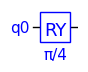

In [32]:
qc = QCircuit(1)
qc.ry(pi / 4, f'{PI}/4', 0)
qc.draw()

```
API:
   ry(theta: float, t: int)
      theta : the angle in radians
      label : text label for the angle
      t     : the target qubit
```

The RY gate is described by the following matrix:

$$
RY(\theta) =  \begin{bmatrix}
\cos(\frac{\theta}{2}) & -\sin(\frac{\theta}{2}) \\
 \sin(\frac{\theta}{2}) & \cos(\frac{\theta}{2}) \end{bmatrix}
$$

Note: RY($\pi$) and Y differ by a global phase:

$$
RY(\pi) = \begin{bmatrix}
0 & -1 \\ 1  & 0
\end{bmatrix}\quad\textrm{whereas}\quad
Y = \begin{bmatrix}
0 & -i \\ i  & 0
\end{bmatrix}
$$

Hence $Y=i\,RY(\pi)$.

### S Gate

The S gate performs a phase rotation by $\pi/2$ radians. It can be thought of as the square-root of the Z gate. Applying it twice is equivalent to a Z gate.

$$
S=\sqrt{Z}
$$

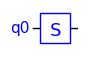

In [33]:
qc = QCircuit(1)
qc.s(0)
qc.draw()

```
API:
   s(t: int)
      t : the target qubit
```

The S gate is described by the following matrix:

$$
S =\begin{bmatrix}1 & 0 \\ 0 & i \end{bmatrix}
$$

### Sdg Gate

The Sdg (S-dagger) $S^\dagger$ gate is the conjugate transpose of the S gate. It performs a phase rotation by $-\pi/2$ radians.

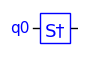

In [34]:
qc = QCircuit(1)
qc.sdg(0)
qc.draw()

```
API:
   sdg(t: int)
      t : the target qubit
```

The Sdg gate is described by the following matrix:

$$
Sdg =\begin{bmatrix}1 & 0 \\ 0 & -i \end{bmatrix}
$$

### SWAP Gate

The SWAP gate swaps the state of two qubits.

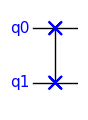

In [35]:
qc = QCircuit(2)
qc.swap(0, 1)
qc.draw()

```
API:
   swap(c: int, t1: int, t2: int)
      t1 : the first target qubit
      t2 i: the second target qubit
```

The SWAP gate is described by the following matrix:

$$
SWAP =\begin{bmatrix}1&0&0&0 \\ 0&0&1&0 \\ 0&1&0&0 \\ 0&0&0&1 \end{bmatrix}
$$

### SX (aka V, SQRTX) Gate

The SX gate can be thought of as the square-root of the X gate. Applying it twice is equivalent to an X gate:

$$
SX=\sqrt{X}
$$

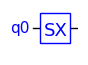

In [36]:
qc = QCircuit(1)
qc.sx(0)
qc.draw()

```
API:
   sx(t: int)
     t : the target qubit
```

The SX gate is described by the following matrix:

$$
SX =\frac{1}{\sqrt{2}}\begin{bmatrix}1+i & 1-i \\ 1-i & 1+i \end{bmatrix}
$$

Note that $V^\dagger$ is the other square-root of X.

### T Gate

The T gate performs a phase rotation by $\pi/4$ radians. It can be thought of as the square-root of the S gate. Applying it twice is equivalent to a S gate:

$$
T = \sqrt{S}
$$

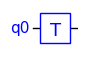

In [37]:
qc = QCircuit(1)
qc.t(0)
qc.draw()

```
API:
   t(t1: int)
      t1 : the target qubit
```

The T gate is described by the following matrix:

$$
T =\begin{bmatrix}1 & 0 \\ 0 & e^{i\frac{\pi}{4}} \end{bmatrix}
$$

Somewhat confusingly, the T gate is sometimes known as the $\pi/8$ gate. This because it can be written in a symmetrical form (up to global phase) as:

$$
T =\begin{bmatrix} e^{i\frac{\pi}{8}}& 0 \\ 0 & e^{i\frac{\pi}{8}} \end{bmatrix}
$$

### Tdg Gate

The Tdg (T-dagger) $T^\dagger$ gate is the conjugate transpose of the T gate. It performs a phase rotation by $-\pi/4$ radians.

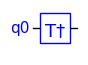

In [38]:
qc = QCircuit(1)
qc.tdg(0)
qc.draw()

```
API:
   tdg(t: int)
      t : the target qubit
```

The Tdg gate is described by the following matrix:

$$
Tdg =\begin{bmatrix}1 & 0 \\ 0 & e^{-i\frac{\pi}{4}} \end{bmatrix}
$$

### U Gate

The U gate takes a $2^N \times 2^N$ unitary matrix and applies it as an N-qubit gate. The simplest case is a single-qubit gate, which has a 2x2 matrix.

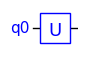

In [39]:
u = np.eye(2)  # Dummy gate

qc = QCircuit(1)
qc.u(u, 'U', 0)
qc.draw()

```
API:
   u(u: ndarray, name: str, *t: int)
      u    : unitary numpy matrix
      name : Name of gate   
      *t    : the target qubits
```

The unitary matrix is of size $2^k \times 2^k$ for $k$ target qubits.

### X (aka NOT) Gate

The X gate is the quantum NOT operator. It is a rotation by $\pi$ about the X axis of the Bloch sphere.

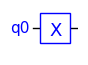

In [40]:
qc = QCircuit(1)
qc.x(0)
qc.draw()

```
API:
   x(t: int)
      t : the target qubit
```

The X gate is described by the following matrix:

$$
X =\begin{bmatrix}0 & 1 \\ 1 & 0 \end{bmatrix}
$$

### Y Gate

The Y gate It is a rotation by $\pi$ about the Y axis of the Bloch sphere.

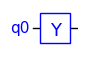

In [41]:
qc = QCircuit(1)
qc.y(0)
qc.draw()

```
API:
   y(t: int)
      t : the target qubit
```

The Y gate is described by the following matrix:

$$
Y = \begin{bmatrix}0 & -i \\ i & 0 \end{bmatrix}
$$

### Z Gate

The Z gate It is a rotation by $\pi$ about the Z axis of the Bloch sphere.

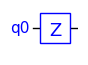

In [42]:
qc = QCircuit(1)
qc.z(0)
qc.draw()

```  
API:
   z(t: int)
      t : the target qubit
```

The Z gate is described by the following matrix:

$$
Z =\begin{bmatrix}1&0 \\ 0&-1 \end{bmatrix}
$$

## Non-Unitary Operations

This section covers circuit elements that are not considered to be quantum gates because they are not reversible unitary operations.

### Measure

The 'measure' operation performs a quantum measurement on one or more qubits.

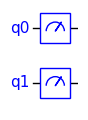

In [43]:
qc = QCircuit(2)
qc.measure(0, 1)
qc.draw()

```
API:
   measure(t1, t2, ... : int)
      t1, t2, ... : the qubits to be measured
```

If the argument list is left blank, then all qubits will be measured.

### Reset

The 'reset' operation resets a qubit to the $\ket{0}$ state.

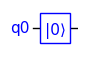

In [44]:
qc = QCircuit(1)
qc.reset(0)
qc.draw()

It is equivalent to a measurement of the qubit, followed by an X operation conditional on the measurement result being 1.

```
API:
   reset(t: int)
      t : the target qubit
```

## Other Symbols

### Barrier

A barrier is drawn in the circuit as a vertical dotted line, like a fence separating sections of the circuit. Its main use is to prevent circuit optimizations crossing boundaries. This does not apply to TinyQsim since it currently does no circuit optimization. However, a barrier can still be useful for separating parts of the circuit for clarify, for example to separate initialization from processing.

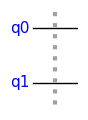

In [45]:
qc = QCircuit(2)
qc.barrier()
qc.draw()

```
API:
   barrier()
```